In [140]:
import pandas as pd
import seaborn as sns
import numpy as np
import math
from matplotlib import pyplot as plt
import os
%matplotlib inline 

In [141]:
base_path =  "../experimental_data/mixing_time_experiment_1685792813"
path = os.path.join(base_path,"data.csv" )

In [146]:
df = pd.read_csv(path, index_col=0)

In [147]:
df["$Log(Mixing Time)$"] = np.log(df["mixing_time"])
df["$Bound$"] = df["bound"]
df["$Hyper\; Cube \;  Dimension$"] = df["size"]

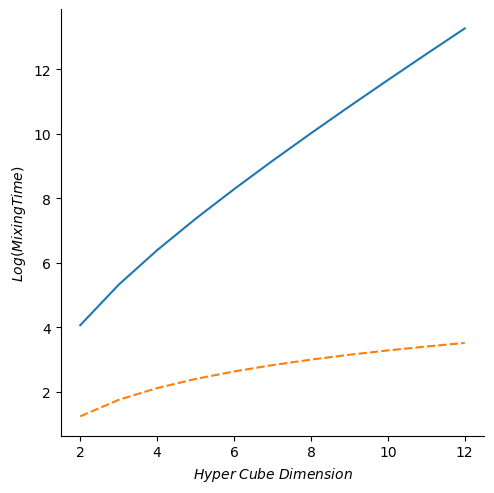

In [148]:
sns.relplot(kind="line", data=df, x="$Hyper\; Cube \;  Dimension$", y="$Log(Mixing Time)$", style="$Bound$", hue="$Bound$", legend=False)
plt.savefig(os.path.join(base_path, "mixing_time.pdf"), dpi=1000)

In [149]:
def compute_error_bound(tmix, time_step, delta):
    n = time_step - 1 + 1
    return math.sqrt(math.log(2/(1-delta)) * time_step * min(n, 1) * 9 * tmix / (2 * n ** 2))

def compute_n(tmix, epsilon, delta):
    return math.log(2/(1-delta))*9*tmix/(2*epsilon**2)

In [150]:
df["$Error$"] = df["mixing_time"].apply(lambda x: compute_error_bound(x, 10**6, 0.95))
df["$Observations$"] = df["mixing_time"].apply(lambda x: compute_n(x, 0.01, 0.95))

In [133]:
compute_n(170589, 0.001, 0.95)/10

2831770157390.2896

In [129]:
375000000/10**10

0.0375

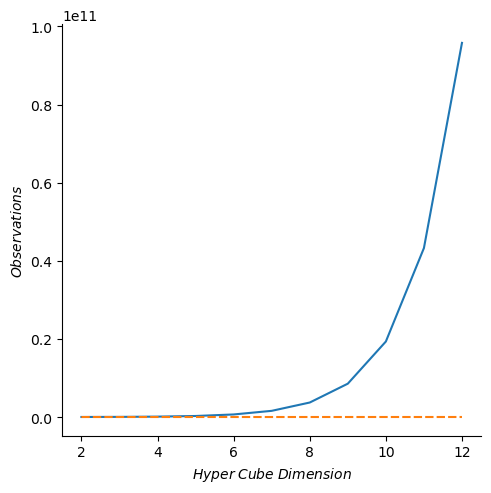

In [152]:
sns.relplot(kind="line", data=df, x="$Hyper\; Cube \;  Dimension$", y="$Observations$", hue="$Bound$", style="$Bound$", legend=False)
plt.savefig(os.path.join(base_path, "observation_number.pdf"), dpi=1000)

In [65]:
df

,size,bound,mixing_time,Log(Mixing Time),Bound,Hyper Cube Size,Error,Observations
0,2,loose,58.385675,58.385675,loose,2,0.031132,9.691997e+06
1,2,tight,3.465736,3.465736,tight,2,0.007585,5.753107e+05
2,3,loose,204.947434,204.947434,loose,3,0.058328,3.402119e+07
3,3,tight,5.780744,5.780744,tight,3,0.009796,9.596010e+05
4,4,loose,597.120576,597.120576,loose,4,0.099560,9.912176e+07
5,4,tight,8.317766,8.317766,tight,4,0.011751,1.380746e+06
6,5,loose,1581.420852,1581.420852,loose,5,0.162023,2.625152e+08
7,5,tight,11.042922,11.042922,tight,5,0.013539,1.833120e+06
8,6,loose,3956.089171,3956.089171,loose,6,0.256263,6.567091e+08
9,6,tight,13.928611,13.928611,tight,6,0.015206,2.312143e+06


In [139]:
10**11-8300000000

91700000000

In [ ]:
8300000000-